<img src="imgs/mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S8: Contaminación en Madrid

## Objetivos:

* Experimentar con datos de Open Data Madrid.
* Trabajar con datos de localización.
* Representar la contaminación en Madrid del mes de septiembre de 2018.

**NOTA:** Actualmente Google Chrome tiene un problema al renderizar gráficos complejos con folium. Por eso **se recomienda encarecidamente** el realizar esta sesión con __[Mozilla Firefox](https://www.mozilla.org/es-ES/firefox/new/)__. Si nuestro navegador por defecto no es Firefox, podremos acceder al servidor de Jupyter Notebook una vez lo hayamos lanzado, copiando la url que contiene el token en el navegador Firefox.

<img src="imgs/notebookrun.png"/>

## Inicializamos entorno

In [2]:
import numpy as np
import pandas as pd
import re
import folium
import random

%matplotlib inline
import matplotlib.pyplot as plt 

estaciones = pd.read_csv("data/madrid_estaciones_cont.csv")
contamina = pd.read_csv('data/contamina_2018_09_diario.csv')

random.seed(1234)

Empezaremos a trabajar con los puestos de medida de la contaminación de Madrid. 

In [3]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
Unnamed: 0         0 non-null float64
NÚMERO             38 non-null object
ESTACIÓN           40 non-null object
DIRECCIÓN          40 non-null object
LONGITUD           37 non-null object
LATITUD            37 non-null object
ALTITUD            37 non-null float64
TIPO ESTACION *    37 non-null object
NO2                37 non-null object
SO2                12 non-null object
CO                 17 non-null object
PM10               14 non-null object
PM2,5              7 non-null object
O3                 23 non-null object
BTX                8 non-null object
HC                 4 non-null object
UV                 3 non-null object
VV                 6 non-null object
DV                 6 non-null object
TMP                11 non-null object
HR                 5 non-null object
PRB                3 non-null object
RS                 2 non-null object
LL                 21 non-null 

In [4]:
estaciones.head()

Unnamed: 0 NÚMERO             ESTACIÓN  \
0         NaN      4       Pza. de España   
1         NaN      8     Escuelas Aguirre   
2         NaN     11  Avda. Ramón y Cajal   
3         NaN     16         Arturo Soria   
4         NaN     17           Villaverde   

                                           DIRECCIÓN         LONGITUD  \
0                                    Plaza de España  3º 42' 44,09''O   
1                    Entre C/ Alcalá y C/ O’ Donell   3º 40' 56,35''O   
2   Avda. Ramón y Cajal  esq. C/ Príncipe de Vergara  3º 40' 38,48''O   
3  C/ Arturo Soria  esq. C/  Vizconde de los Asilos   3º 38' 21,24''O   
4                                  C/. Juan Peñalver  3º 42' 47,96''O   

            LATITUD  ALTITUD TIPO ESTACION * NO2  SO2 ...   BTX   HC   UV  \
0  40º 25' 25,87''N    635.0              UT   X    X ...   NaN  NaN  NaN   
1  40º 25' 17,63''N    670.0              UT   X    X ...     X    X  NaN   
2  40º 27' 05,31''N    708.0              UT   X  NaN ...     X  NaN  NaN   
3  40º 26' 24,17''N    693.0              UF   X  NaN ...   NaN  NaN  NaN   
4  40º 20' 49,70''N    604.0              UF   X    X ...   NaN  NaN  NaN   

    VV   DV  TMP   HR  PRB   RS   LL  
0    X    X    X    X  NaN  NaN    X  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN    X  
3  NaN  NaN  NaN  NaN  NaN  NaN    X  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 24 columns]

Haremos uso de la función proporcionada en el worksheet para transformar las coordenadas de grados, minutos y segundos a meridiano.

In [5]:
def convertir_coords(s):
    # https://pythex.org/
    import re
    if s is np.nan:
        return np.nan
    
    degrees, minutes, seconds, direction = re.split('[º \' "]+', s)
    seconds = seconds.replace(",", ".")
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','O'):
        dd*= -1
    
    return dd

## Preprocesamiento y exploración de los datos de sensores

Aplica las transformaciones necesarias y construye un mapa de los datos de exploración de sensores de contaminación.

In [6]:
# TU CÓDIGO AQUÍ
estaciones['Lon'] = estaciones['LONGITUD'].apply(convertir_coords)
estaciones['Lat'] = estaciones['LATITUD'].apply(convertir_coords)
estaciones[['ESTACIÓN', 'LATITUD', 'LONGITUD', 'Lat', 'Lon']].head()

ESTACIÓN           LATITUD         LONGITUD        Lat       Lon
0       Pza. de España  40º 25' 25,87''N  3º 42' 44,09''O  40.423853 -3.712247
1     Escuelas Aguirre  40º 25' 17,63''N  3º 40' 56,35''O  40.421564 -3.682319
2  Avda. Ramón y Cajal  40º 27' 05,31''N  3º 40' 38,48''O  40.451475 -3.677356
3         Arturo Soria  40º 26' 24,17''N  3º 38' 21,24''O  40.440047 -3.639233
4           Villaverde  40º 20' 49,70''N  3º 42' 47,96''O  40.347139 -3.713322

In [28]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 26 columns):
Unnamed: 0         0 non-null float64
NÚMERO             24 non-null int64
ESTACIÓN           24 non-null object
DIRECCIÓN          24 non-null object
LONGITUD           24 non-null object
LATITUD            24 non-null object
ALTITUD            24 non-null float64
TIPO ESTACION *    24 non-null object
NO2                24 non-null object
SO2                10 non-null object
CO                 10 non-null object
PM10               12 non-null object
PM2,5              6 non-null object
O3                 14 non-null object
BTX                6 non-null object
HC                 3 non-null object
UV                 3 non-null object
VV                 5 non-null object
DV                 5 non-null object
TMP                9 non-null object
HR                 4 non-null object
PRB                3 non-null object
RS                 2 non-null object
LL                 13 non-null ob

In [7]:
#Eliminamos los datos nulos de latitud y longitud
estaciones = estaciones[~estaciones['Lat'].isna()]
estaciones = estaciones[~estaciones['Lon'].isna()]

In [8]:
MADRID_COORDS = [estaciones['Lat'].mean(), estaciones['Lon'].mean()]

m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['NÚMERO'] +": "+ row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)

In [9]:
#mostramos el mapa
m

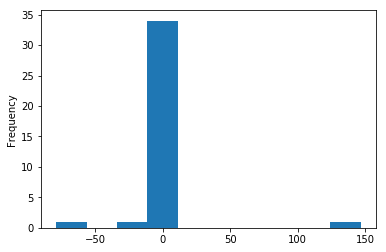

In [10]:
estaciones['Lon'].plot(kind = "hist")

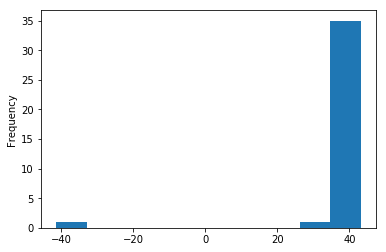

In [11]:
estaciones['Lat'].plot(kind = "hist")

In [12]:
estaciones = estaciones[estaciones['Lon'] > -10.]
estaciones = estaciones[estaciones['Lon'] < 10.]


estaciones = estaciones[estaciones['Lat'] > 40.]

In [13]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)
        
# convertimos coordenadas a array de dos dimensiones
stationArr = estaciones[['Lat', 'Lon']].values

# ploteamos heatmap
from folium import plugins
m.add_child(plugins.HeatMap(stationArr, radius=25))
m

## Representación de contaminación durante el mes de septiembre

Preprocesa y representa los datos de contaminación en Madrid para el mes de septiembre. Tienes los datos cargados en la variable `contamina`.

In [14]:
contamina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
ESTACION    720 non-null int64
MAGNITUD    720 non-null int64
ANO         720 non-null int64
MES         720 non-null int64
DIA         720 non-null int64
H08         720 non-null float64
dtypes: float64(1), int64(5)
memory usage: 33.8 KB


In [15]:
contamina.head()

ESTACION  MAGNITUD   ANO  MES  DIA   H08
0         4         7  2018    9    1   3.0
1         4         7  2018    9    2   3.0
2         4         7  2018    9    3  36.0
3         4         7  2018    9    4  51.0
4         4         7  2018    9    5  10.0

In [16]:
print("Máximo valor de contaminación: {}".format(max(contamina['H08'])))
print("Mínimo valor de contaminación: {}".format(min(contamina['H08'])))

Máximo valor de contaminación: 133.0
Mínimo valor de contaminación: 0.0


In [17]:
contamina['datestr'] = contamina['ANO'].astype(str) +"-"+ contamina['MES'].astype(str) +"-"+ contamina['DIA'].astype(str)
contamina['date'] = contamina.apply(lambda x: pd.to_datetime(x['datestr']), axis=1)
contamina.head()

ESTACION  MAGNITUD   ANO  MES  DIA   H08   datestr       date
0         4         7  2018    9    1   3.0  2018-9-1 2018-09-01
1         4         7  2018    9    2   3.0  2018-9-2 2018-09-02
2         4         7  2018    9    3  36.0  2018-9-3 2018-09-03
3         4         7  2018    9    4  51.0  2018-9-4 2018-09-04
4         4         7  2018    9    5  10.0  2018-9-5 2018-09-05

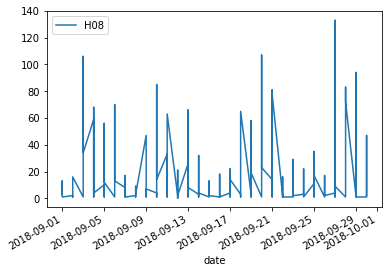

In [18]:
contamina.sort_values(by = "date").plot(x = "date", y= "H08")

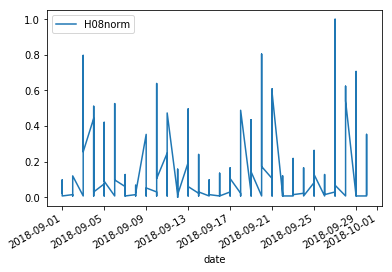

In [19]:
contamina['H08norm'] = contamina['H08'] / max(contamina['H08'])
contamina.sort_values(by = "date").plot(x = "date", y= "H08norm")

In [20]:
estaciones['NÚMERO'] = estaciones['NÚMERO'].astype(int)
merged = estaciones.merge(contamina, how = "inner", left_on = "NÚMERO", right_on = "ESTACION")
merged = merged[["ESTACION", "DIRECCIÓN", "Lon", "Lat", "date", "datestr", "H08norm", "H08"]]
merged.head()

ESTACION        DIRECCIÓN       Lon        Lat       date   datestr  \
0         4  Plaza de España -3.712247  40.423853 2018-09-01  2018-9-1   
1         4  Plaza de España -3.712247  40.423853 2018-09-02  2018-9-2   
2         4  Plaza de España -3.712247  40.423853 2018-09-03  2018-9-3   
3         4  Plaza de España -3.712247  40.423853 2018-09-04  2018-9-4   
4         4  Plaza de España -3.712247  40.423853 2018-09-05  2018-9-5   

    H08norm   H08  
0  0.022556   3.0  
1  0.022556   3.0  
2  0.270677  36.0  
3  0.383459  51.0  
4  0.075188  10.0

In [21]:
days = merged['date'].unique()

heatmap_data = []
for d in days:
    day_data = [[row['Lat'], row['Lon'], row['H08norm']] for i, row in merged[merged['date'] == d].iterrows()]
    heatmap_data.append(day_data)
    
heatmap_data

[[[40.423852777777775, -3.7122472222222225, 0.022556390977443608],
  [40.42156388888888, -3.6823194444444445, 0.007518796992481203],
  [40.451475, -3.6773555555555553, 0.007518796992481203],
  [40.44004722222222, -3.6392333333333333, 0.007518796992481203],
  [40.34713888888889, -3.713322222222222, 0.007518796992481203],
  [40.394780555555556, -3.7318527777777777, 0.015037593984962405],
  [40.419355555555555, -3.7473472222222224, 0.007518796992481203],
  [40.47692777777778, -3.580030555555555, 0.09774436090225563],
  [40.41920833333333, -3.7031722222222223, 0.015037593984962405],
  [40.40794722222222, -3.6453055555555554, 0.015037593984962405],
  [40.445544444444444, -3.707127777777778, 0.007518796992481203],
  [40.47822777777778, -3.7115416666666667, 0.007518796992481203],
  [40.388152777777776, -3.6515222222222223, 0.015037593984962405],
  [40.398113888888886, -3.6868250000000002, 0.007518796992481203],
  [40.43989722222222, -3.690366666666667, 0.007518796992481203],
  [40.41444444444

In [22]:
MADRID_COORDS = [40.4167,  -3.70325]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for index, row in estaciones.iterrows():
    if row['Lat'] != np.nan and row['Lon'] != np.nan: 
        folium.CircleMarker([row['Lat'], row['Lon']],
                            radius=2,
                            popup=row['DIRECCIÓN'],
                            fill_color="#3db7e4",
                           ).add_to(m)


hm = plugins.HeatMapWithTime(heatmap_data, radius = 60)
hm.add_to(m)
m

## Optimización de rutas

En el worksheet hemos hablado de optimización de rutas como un problema recurrente sobretodo para operaciones logísticas. Lamentablemente, no somos capaces de hacerlo por fuerza bruta en problemas grandes y tampoco sin distancias de ruta por carretera reales. Sin embargo, sí que tenemos la distancia haversine.

Imagina que después de una tormenta eléctrica, todos los dispositivos de medición de contaminación en Madrid se han estropeado y que eres el técnico encargado de repararlos. Si la central del técnico está situada en el punto origen propuesto, construye un algoritmo que calcule la ruta óptima, siendo esta la que más sensores permita reparar en menor tiempo posible y obtén la distancia total recorrida.

Estructura del algoritmo propuesta:
* Establecer punto de origen
* Repetir hasta que no queden puntos por visitar:
    * Calcular desde el punto actual la distancia a todos los puntos restantes.
    * Escoger el punto más cercano.
    * Marcar ese punto como punto ya visitado. No queremos visitar un mismo punto varias veces.
    * Establecer como nuevo punto de origen el seleccionado como más cercano.
* Una vez no queden más puntos por visitar, calcula la distancia de vuelta directamente a la central del técnico.

¿Serías capaz de pintar esta ruta en un mapa de folium?

In [23]:
ORIGEN_COORDS = [40.398113888888886, -3.6868250000000002]

def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radio de la tierra en km.
    
    return c * r

In [24]:
estacion = merged [['ESTACION','Lon', 'Lat']]
estacion = estacion.drop_duplicates()
estacion = estacion.dropna()
estacion = estacion.astype(float)
estacion = np.array(estacion)
estacion0 = estacion

In [26]:
camino = []
next_st = []
dist = []
while len(estacion) != 0:
    dist_min = 100000000000000000
    distance = []
    i = 0
    while i < len(estacion):
        distance = haversine(ORIGEN_COORDS[1], ORIGEN_COORDS[0], estacion[i][1], estacion[i][2])
        if dist_min > distance:
            dist_min = distance
            next_pos = [estacion[i][1], estacion[i][2]] 
            next_station = estacion[i][0]
            dis = i
        i += 1
    camino.append(next_pos)
    dist.append(dist_min)
    next_st.append(next_station)
    ORIGEN_COORDS = next_pos
    estacion = np.delete(estacion, dis, axis = 0)

In [27]:
MADRID_COORDS = [40.4425, -3.6950]
m = folium.Map(MADRID_COORDS, zoom_start=11)

for i, e in enumerate(camino):
    folium.CircleMarker([e[1], e[0]],
                    radius=2,
                    fill_color="#3db7e4",
                   ).add_to(m)

path = []
for i in range(len(camino)):
    path.append([camino[i][1], camino[i][0]])

folium.PolyLine(path, color="blue", weight=2.5, opacity=1).add_to(m)
folium.Marker(path[0]).add_to(m)

m

Compara ahora tu resultado con el resultado de OR-Tools. Recuerda que necesitas llamar a la función ```optimize_route_by_distance``` que requiere los siguientes parámetros:
* Lista de localizaciones en coordenadas GPS.
* Lista de nombres de las localizaciones en el mismo orden.
* Localización de salida de los vehículos. Es el índice de uno de los puntos de localización. Siendo 0 el primer elemento, 1 el segundo, etc...
* Número de vehículos, en este caso sólo uno.

In [26]:
from optimizer import *

# TU CÓDIGO AQUÍ
origin = [40.398113888888886, -3.6868250000000002]
names = []
locations = []
for i in range(len(estacion0)):
    names.append(estacion0[i][0])
    locations.append([estacion0[i][2], estacion0[i][1]])

routes = optimize_route_by_distance(locations, names, origin = 13, n_vehicles = 1)

Computing distance matrix...
Creating data model...
Solving...


Route for vehicle 0:
 13 -> 15 -> 1 -> 12 -> 17 -> 9 -> 3 -> 18 -> 7 -> 22 -> 20 -> 23 -> 21 -> 11 -> 16 -> 2 -> 14 -> 10 -> 8 -> 0 -> 6 -> 5 -> 19 -> 4 -> 13
Distance of route: 80 km

Total distance of all routes: 80 km
Plan for vehicle 0:[13]: 47.0 ->[15]: 49.0 ->[1]: 8.0 ->[12]: 40.0 ->[17]: 54.0 ->[9]: 36.0 ->[3]: 16.0 ->[18]: 55.0 ->[7]: 27.0 ->[22]: 59.0 ->[20]: 57.0 ->[23]: 60.0 ->[21]: 58.0 ->[11]: 39.0 ->[16]: 50.0 ->[2]: 11.0 ->[14]: 48.0 ->[10]: 38.0 ->[8]: 35.0 ->[0]: 4.0 ->[6]: 24.0 ->[5]: 18.0 ->[19]: 56.0 ->[4]: 17.0 ->[0]: 4.0


¿Serías capaz de mostrarla en folium para comparar?

In [31]:
# TU CÓDIGO AQUÍ

MADRID_COORDS = [40.4425, -3.6950]
m = folium.Map(MADRID_COORDS, zoom_start=11.25)

for i, e in enumerate(locations):
    folium.CircleMarker([e[0], e[1]],
                    radius=2,
                    fill_color="#3db7e4",
                   ).add_to(m)

folium.PolyLine(locations).add_to(m)
folium.Marker(locations[13]).add_to(m)

m

Como podemos observar, el resultado de ambas rutas es completamente diferente. Esto es debido a que en el caso anterior calculamos la distancia heurística y elegimos el punto siguiente más cercano como próximo destino. Sin embargo, con OR-Tools se calculan todas las combinaciones posibles de rutas (usando también distancias heurísticas) y elige aquella de menor recorrido. En el primer caso no teníamos en cuenta el número total de km, sino únicamente aquellos al punto más cercano.